            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8


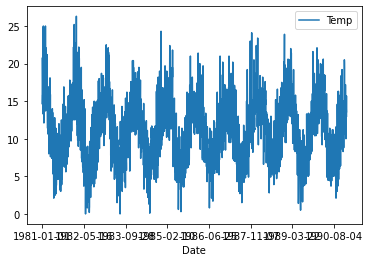

In [20]:
from pandas import read_csv
from matplotlib import pyplot

series = read_csv('daily-min-temperatures.csv', header=0, index_col=0)
print(series.head())
series.plot()
pyplot.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Coefficients: {'k': array([[-0.22258744]]), 'm': array([[0.45357869]]), 'delta': array([[-8.41290370e-08, -1.76349388e-09, -1.62921187e-08,
         1.67595272e-07,  6.35931195e-02,  1.16235857e-01,
         4.63293739e-02,  1.84396863e-08,  1.80317593e-08,
        -1.68624018e-07, -1.17456036e-07, -3.10016372e-08,
        -1.80277335e-08, -5.93900224e-08, -6.48340970e-08,
         7.44082494e-08, -2.30302665e-04, -1.53334804e-08,
        -1.56466113e-07,  1.47121606e-08, -7.53456250e-09,
         1.36660252e-04,  6.07346079e-02,  1.11772653e-01,
         2.95779976e-02]]), 'sigma_obs': array([[0.10439083]]), 'beta': array([[ 0.06347137,  0.14322662,  0.01493135, -0.01563464, -0.00292866,
         0.00539486, -0.00348933, -0.00642281,  0.00272376,  0.00398319,
         0.00190463, -0.00092441, -0.00055757,  0.00128543, -0.00286756,
         0.00569811,  0.0019342 , -0.00161295,  0.00626155, -0.00028874,
        -0.00400672,  0.00166982,  0.00141625, -0.0026741 , -0.00165373,
        -0

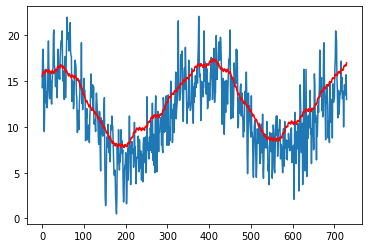

In [21]:
# create and evaluate a Prophet model      
from pandas import read_csv
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas import to_datetime

# load dataset
df = read_csv('daily-min-temperatures.csv', header=0)

# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])     

# split dataset
size = int(len(df) * 0.8)
train, test = df[0:size], df[size:len(df)]

# train Prophet
model = Prophet(yearly_seasonality=True)   

# fit the model
model_fit = model.fit(train)
print('Coefficients: %s' % model_fit.params)    

# make predictions
predictions = model_fit.predict(test)
y_pred = predictions['yhat'].values
y_true = test['y'].values
rmse = sqrt(mean_squared_error(y_true, y_pred))
print('Test RMSE: %.3f' % rmse)

# plot results
pyplot.plot(y_true)
pyplot.plot(y_pred, color='red')
pyplot.show()